In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

# Matplotlib

For this excercise, we have written the following code to load the stock dataset built into plotly express.

In [3]:
stocks = px.data.stocks()
stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


## Question 1: 

Select a stock and create a suitable plot for it. Make sure the plot is readable with relevant information, such as date, values.  

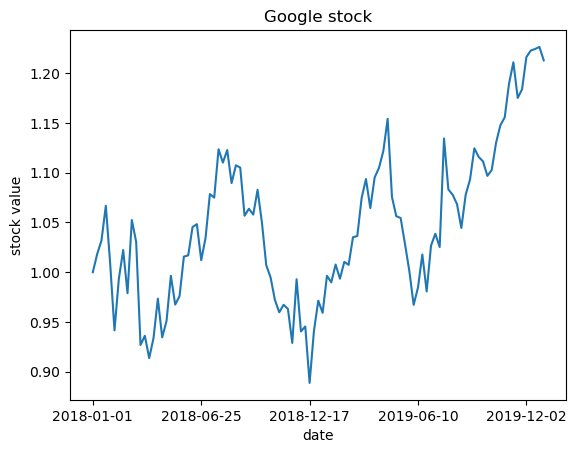

In [4]:
# YOUR CODE HERE

fig, ax = plt.subplots()
ax.plot('date', 'GOOG', data=stocks)
# set title
ax.set_title('Google stock')
# horizontal axis
ax.set_xlabel('date')
# vertical axis
ax.set_ylabel('stock value')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.show()


## Question 2: 

You've already plot data from one stock. It is possible to plot multiples of them to support comparison.  
To highlight different lines, customise line styles, markers, colors and include a legend to the plot.

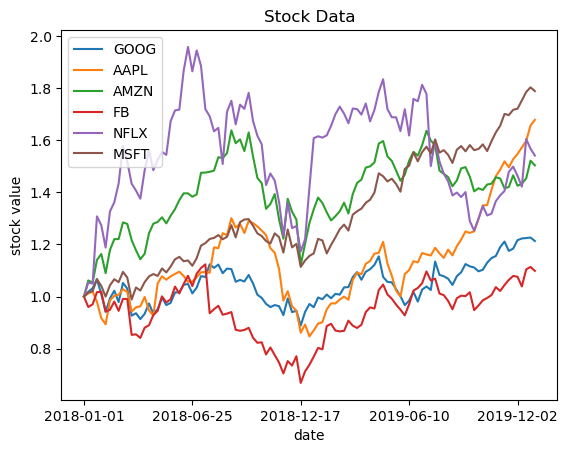

In [5]:
# YOUR CODE HERE

fig, ax = plt.subplots()
ax.plot('date', 'GOOG', data=stocks)
ax.plot('date', 'AAPL', data=stocks)
ax.plot('date', 'AMZN', data=stocks)
ax.plot('date', 'FB', data=stocks)
ax.plot('date', 'NFLX', data=stocks)
ax.plot('date', 'MSFT', data=stocks)
# set title
ax.set_title('Stock Data')
# horizontal axis
ax.set_xlabel('date')
# vertical axis
ax.set_ylabel('stock value')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
# show legends

plt.legend()
plt.show()


# Seaborn

First, load the [tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) dataset

In [6]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Question 3:

Let's explore this dataset. Pose a question and create a plot that support drawing answers for your question.

Some possible questions:
- Are there differences between male and female when it comes to giving tips?
- What attribute correlate the most with tip?

QUESTION: 
"Does smoker gives more tips than non-smoker?"

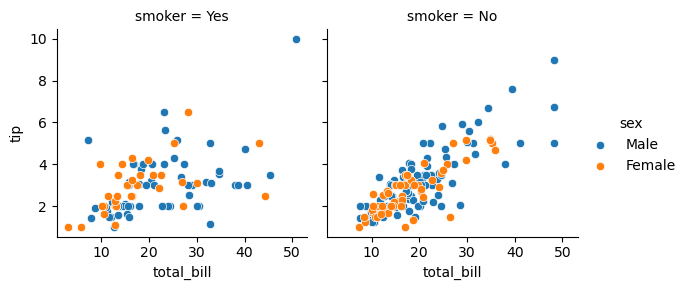

In [7]:
# YOUR CODE HERE
g = sns.FacetGrid(tips, col='smoker', hue='sex')
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.show()


# Plotly Express

## Question 4:

Redo the above exercises (challenges 2 & 3) with plotly express. Create diagrams which you can interact with.

### The stocks dataset

*Hints*:
- Turn stocks dataframe into a structure that can be picked up easily with plotly express

In [17]:
# YOUR CODE HERE
import plotly.graph_objects as go

df = px.data.stocks()
list = df.columns
fig = px.line(df, x="date", y=list, markers='True', symbol='variable')
fig.update_traces(selector = dict(type='-'))
fig.show()

### The tips dataset

In [9]:
# YOUR CODE HERE

fig = px.scatter(tips, x="total_bill", y="tip", color="sex", facet_col="smoker")
fig.show()

## Question 5:

Recreate the barplot below that shows the population of different continents for the year 2007. 

*Hints:*

- Extract the 2007 year data from the dataframe. You have to process the data accordingly
- use [plotly bar](https://plotly.com/python-api-reference/generated/plotly.express.bar)
- Add different colors for different continents
- Sort the order of the continent for the visualisation. Use [axis layout setting](https://plotly.com/python/reference/layout/xaxis/)
- Add text to each bar that represents the population 

In [10]:
#load data
df = px.data.gapminder()
df.head()
df_2007 = df.query('year==2007')
df_2007_new = df_2007.groupby('continent').sum()
df_2007_new

,year,lifeExp,pop,gdpPercap,iso_num
continent,,,,,
Africa,104364,2849.914,929539692,160629.695446,23859
Americas,50175,1840.203,898871184,275075.790634,9843
Asia,66231,2334.040,3811953827,411609.886714,13354
Europe,60210,2329.458,586098529,751634.449078,12829
Oceania,4014,161.439,24549947,59620.376550,590


In [12]:
# YOUR CODE HERE

fig = px.bar(df_2007_new, x="pop", y=df_2007_new.index, color=df_2007_new.index, orientation='h', text_auto='.2s')
fig.update_traces(textposition='outside', textfont_size=14)
fig.update_yaxes(categoryorder="max ascending")
fig.update_layout(showlegend=False)
fig.show()